# Which GO term set is more relevant for our analysis?  


Should we use the non-redundancy filter on Pannzer, and should we manually add all parent GO term in our list? 

Shifting parameters or combining some methods can change the list of GO terms associated with a transcript. However, it is impossible to do an entire analysis with too many variants of the original dataset: it is confusing, and the number of different input increases exponentially for each new parameter we look at. 

We have 2 raw PANNZER outputs with the non-redundancy filter turn ON and OFF. And 2 modification of these outputs where we manually add parent go term recursively.
We'll use nrON/nrOFF as an abbreviation for datasets with ou without the filter, and hierON/OFF for datasets with or without the hierarchy.

In [1]:
import sys
sys.path.append("..")
import panzzer_out_api as poa
import obonet


In [2]:
url = 'http://purl.obolibrary.org/obo/go/go-basic.obo'
GO_GRAPH = obonet.read_obo(url, ignore_obsolete=False)

In [3]:
GO_GRAPH.remove_edges_from([edge for edge in GO_GRAPH.edges if (edge[2] != 'is_a' and edge[2] != 'part_of')])
GO_GRAPH.remove_nodes_from([node for node in GO_GRAPH.nodes if node in ['GO:0005575', 'GO:0008150', 'GO:0003674']])

We will explore chromosome 1.

In [4]:
chr1_all_nrON = poa.parse_panzzer_annotation('../../data/pannzer_output/chr1.all.nr_on.out', 'all_nrON')
chr1_long_nrON = poa.parse_panzzer_annotation('../../data/pannzer_output/chr1.long.nr_on.out')
chr1_all_nrOFF = poa.parse_panzzer_annotation('../../data/pannzer_output/chr1.all.nr_off.out', 'all_nrOFF')
chr1_long_nrOFF = poa.parse_panzzer_annotation('../../data/pannzer_output/chr1.long.nr_off.out')

chr1_mane_nrON = poa.parse_panzzer_annotation('../../data/pannzer_output/chr1.mane.nr_on.out')
chr1_best_nrON = poa.make_best_single_isoform_annotation(chr1_all_nrON)
chr1_mane_nrOFF = poa.parse_panzzer_annotation('../../data/pannzer_output/chr1.mane.nr_off.out')
chr1_best_nrOFF = poa.make_best_single_isoform_annotation(chr1_all_nrOFF)


### Comparaison of HIER ON et HIER OFF for NR ON

In [1]:
import upsetplot
from matplotlib import pyplot

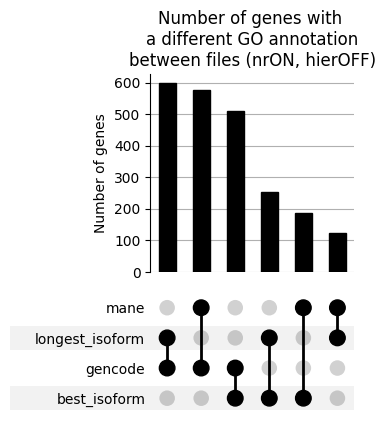

In [6]:
gene_set = [gene for gene in chr1_mane_nrON.genes]


data = upsetplot.from_memberships([
    ['gencode','longest_isoform'],
    ['gencode','mane'],
    ['gencode','best_isoform'],
    ['longest_isoform','mane'],
    ['longest_isoform','best_isoform'],
    ['mane','best_isoform'],
],
data = [
    len(poa.genes_with_diff_go_terms(chr1_all_nrON, chr1_long_nrON, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_all_nrON, chr1_mane_nrON, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_all_nrON, chr1_best_nrON, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_long_nrON, chr1_mane_nrON, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_long_nrON, chr1_best_nrON, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_mane_nrON, chr1_best_nrON, gene_set=gene_set)),
]
)


upsetplot.plot(data, sort_by='cardinality', sort_categories_by='input', totals_plot_elements=0 )
pyplot.title('Number of genes with \na different GO annotation\nbetween files (nrON, hierOFF)')
pyplot.ylabel('Number of genes')
pyplot.show()



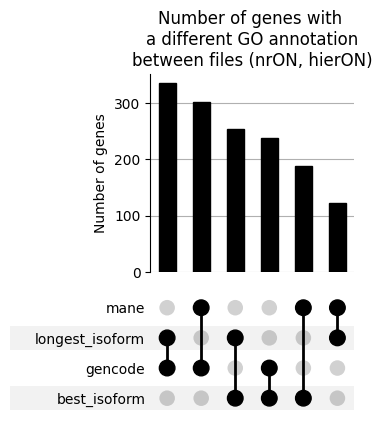

In [7]:
gene_set = [gene for gene in chr1_mane_nrON.genes]

data = upsetplot.from_memberships([
    ['gencode','longest_isoform'],
    ['gencode','mane'],
    ['gencode','best_isoform'],
    ['longest_isoform','mane'],
    ['longest_isoform','best_isoform'],
    ['mane','best_isoform'],
],
data = [
    len(poa.genes_with_diff_go_terms_with_hierarchy(chr1_all_nrON, chr1_long_nrON, gene_set=gene_set, go_graph=GO_GRAPH)),
    len(poa.genes_with_diff_go_terms_with_hierarchy(chr1_all_nrON, chr1_mane_nrON, gene_set=gene_set, go_graph=GO_GRAPH)),
    len(poa.genes_with_diff_go_terms_with_hierarchy(chr1_all_nrON, chr1_best_nrON, gene_set=gene_set, go_graph=GO_GRAPH)),
    len(poa.genes_with_diff_go_terms_with_hierarchy(chr1_long_nrON, chr1_mane_nrON, gene_set=gene_set, go_graph=GO_GRAPH)),
    len(poa.genes_with_diff_go_terms_with_hierarchy(chr1_long_nrON, chr1_best_nrON, gene_set=gene_set, go_graph=GO_GRAPH)),
    len(poa.genes_with_diff_go_terms_with_hierarchy(chr1_mane_nrON, chr1_best_nrON, gene_set=gene_set, go_graph=GO_GRAPH)),
]
)


upsetplot.plot(data, sort_by='cardinality', sort_categories_by='input', totals_plot_elements=0 )
pyplot.title('Number of genes with \na different GO annotation\nbetween files (nrON, hierON)')
pyplot.ylabel('Number of genes')
pyplot.show()



In [8]:
gene_nrON_hierOFF = poa.genes_with_diff_go_terms(chr1_all_nrON, chr1_long_nrON, gene_set=gene_set)
gene_nrON_hierON = poa.genes_with_diff_go_terms_with_hierarchy(chr1_all_nrON, chr1_long_nrON, gene_set=gene_set, go_graph=GO_GRAPH)

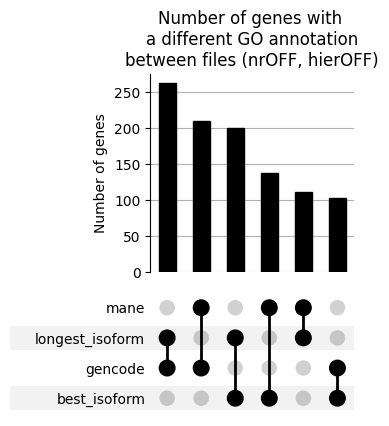

In [9]:
gene_set = [gene for gene in chr1_mane_nrOFF.genes]


data = upsetplot.from_memberships([
    ['gencode','longest_isoform'],
    ['gencode','mane'],
    ['gencode','best_isoform'],
    ['longest_isoform','mane'],
    ['longest_isoform','best_isoform'],
    ['mane','best_isoform'],
],
data = [
    len(poa.genes_with_diff_go_terms(chr1_all_nrOFF, chr1_long_nrOFF, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_all_nrOFF, chr1_mane_nrOFF, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_all_nrOFF, chr1_best_nrOFF, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_long_nrOFF, chr1_mane_nrOFF, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_long_nrOFF, chr1_best_nrOFF, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_mane_nrOFF, chr1_best_nrOFF, gene_set=gene_set)),
]
)


upsetplot.plot(data, sort_by='cardinality', sort_categories_by='input', totals_plot_elements=0 )
pyplot.title('Number of genes with \na different GO annotation\nbetween files (nrOFF, hierOFF)')
pyplot.ylabel('Number of genes')
pyplot.show()

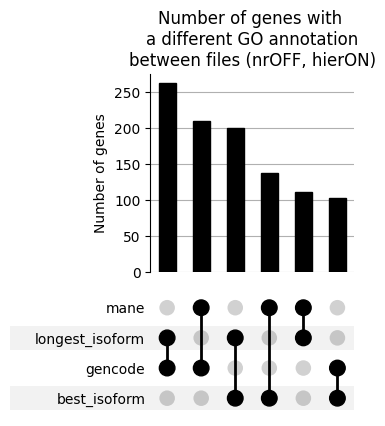

In [10]:
gene_set = [gene for gene in chr1_mane_nrOFF.genes]


data = upsetplot.from_memberships([
    ['gencode','longest_isoform'],
    ['gencode','mane'],
    ['gencode','best_isoform'],
    ['longest_isoform','mane'],
    ['longest_isoform','best_isoform'],
    ['mane','best_isoform'],
],
data = [
    len(poa.genes_with_diff_go_terms_with_hierarchy(chr1_all_nrOFF, chr1_long_nrOFF, gene_set=gene_set, go_graph=GO_GRAPH)),
    len(poa.genes_with_diff_go_terms_with_hierarchy(chr1_all_nrOFF, chr1_mane_nrOFF, gene_set=gene_set, go_graph=GO_GRAPH)),
    len(poa.genes_with_diff_go_terms_with_hierarchy(chr1_all_nrOFF, chr1_best_nrOFF, gene_set=gene_set, go_graph=GO_GRAPH)),
    len(poa.genes_with_diff_go_terms_with_hierarchy(chr1_long_nrOFF, chr1_mane_nrOFF, gene_set=gene_set, go_graph=GO_GRAPH)),
    len(poa.genes_with_diff_go_terms_with_hierarchy(chr1_long_nrOFF, chr1_best_nrOFF, gene_set=gene_set, go_graph=GO_GRAPH)),
    len(poa.genes_with_diff_go_terms_with_hierarchy(chr1_mane_nrOFF, chr1_best_nrOFF, gene_set=gene_set, go_graph=GO_GRAPH)),
]
)


upsetplot.plot(data, sort_by='cardinality', sort_categories_by='input', totals_plot_elements=0 )
pyplot.title('Number of genes with \na different GO annotation\nbetween files (nrOFF, hierON)')
pyplot.ylabel('Number of genes')
pyplot.show()

In [11]:
gene_nrOFF_hierOFF = poa.genes_with_diff_go_terms(chr1_all_nrOFF, chr1_long_nrOFF, gene_set=gene_set)
gene_nrOFF_hierON = poa.genes_with_diff_go_terms_with_hierarchy(chr1_all_nrOFF, chr1_long_nrOFF, gene_set=gene_set, go_graph=GO_GRAPH)

A lot of gene are detect only with nrON_hier_OFF. It's because parent with lower score are discard with the filter. So some isoform of a gene can have a GO term annotate and another his parent. If the longest only have the child, we'll consider that the longest doesn't convey all infortion, even if its wrong but all parent go term are implicit.

I want to find the number of gene with additional information between nrON_hierON and nrOFF_hierOFF.

In [12]:
c = 0
k = []
for gene in chr1_all_nrON.genes:
    go_nroff_hieroff = chr1_all_nrOFF[gene].get_go_term_id()

    go_nron_hieroff = chr1_all_nrON[gene].get_go_term_id()
    go_nron_hieron = poa.go_list_to_go_ancestry(go_nron_hieroff, GO_GRAPH)

    if len(set(go_nroff_hieroff)-set(go_nron_hieron))>0:
        c+=1
        k.append(gene)

print(c, len(chr1_all_nrOFF.genes))


1370 2061


In [15]:
min([len(chr1_all_nrOFF.genes[gene].get_go_term_id()) for gene in k])  # =4
[gene for gene in k if len(chr1_all_nrOFF.genes[gene].get_go_term_id()) == 4]  # ['ENSG00000121904']
print(poa.go_list_to_go_ancestry(chr1_all_nrON.genes['ENSG00000121904'].get_go_term_id(),GO_GRAPH))
print(chr1_all_nrOFF.genes['ENSG00000121904'].get_go_term_id())
print(chr1_all_nrON.genes['ENSG00000121904'].get_go_term_id())


['GO:0110165', 'GO:0016020', 'GO:0071944']
['GO:0110165', 'GO:0016020', 'GO:0005886', 'GO:0071944']
['GO:0016020', 'GO:0071944']


1365 genes / 2061     gain information without the filter because the filter remove child with lower score also.



In [16]:
study_group = set(gene_nrOFF_hierOFF).symmetric_difference(set(gene_nrON_hierON))

In [17]:
cc = 0
for el in study_group:
    if el in k:
        cc += 1
print(cc)

69


In [18]:
len(study_group)


83

It concerns 66/81 genes with difference. Let's study those differences

In [21]:
diffdict = dict()
counter = 0
for gene in study_group:
    lONON = poa.go_list_to_go_ancestry(chr1_long_nrON.genes[gene].get_go_term_id(), GO_GRAPH)
    aONON = poa.go_list_to_go_ancestry(chr1_all_nrON.genes[gene].get_go_term_id(), GO_GRAPH)
    lOFFOFF = chr1_long_nrOFF.genes[gene].get_go_term_id()
    aOFFOFF = chr1_all_nrOFF.genes[gene].get_go_term_id()
    if len(set(aONON) ^ set(lONON))>0:
            counter += 1
print(counter)

78


In [23]:
diffdict = dict()
counter = 0
for gene in study_group:
    lONON = poa.go_list_to_go_ancestry(chr1_long_nrON.genes[gene].get_go_term_id(), GO_GRAPH)
    aONON = poa.go_list_to_go_ancestry(chr1_all_nrON.genes[gene].get_go_term_id(), GO_GRAPH)
    lOFFOFF = chr1_long_nrOFF.genes[gene].get_go_term_id()
    aOFFOFF = chr1_all_nrOFF.genes[gene].get_go_term_id()
    if len(set(aOFFOFF) ^ set(lOFFOFF))>0:
        counter += 1
print(counter)

5


In [19]:
diffdict = dict()
counter = 0
for gene in study_group:
    lONON = poa.go_list_to_go_ancestry(chr1_long_nrON.genes[gene].get_go_term_id(), GO_GRAPH)
    aONON = poa.go_list_to_go_ancestry(chr1_all_nrON.genes[gene].get_go_term_id(), GO_GRAPH)
    lOFFOFF = chr1_long_nrOFF.genes[gene].get_go_term_id()
    aOFFOFF = chr1_all_nrOFF.genes[gene].get_go_term_id()
    if len(set(aONON) ^ set(lONON))>0:
        if len(set(aOFFOFF) ^ set(lOFFOFF))>0:
            counter += 1
print(counter)

0


In [24]:
len(study_group)

83

Between ONON and OFFOFF, we have
5 different genes in ONON but not in OFFOFF
78 different genes in OFFOFF but not in ONON

In [20]:
diffdict = dict()
counter = 0
for gene in study_group:
    lONON = poa.go_list_to_go_ancestry(chr1_long_nrON.genes[gene].get_go_term_id(), GO_GRAPH)
    aONON = poa.go_list_to_go_ancestry(chr1_all_nrON.genes[gene].get_go_term_id(), GO_GRAPH)
    lOFFOFF = chr1_long_nrOFF.genes[gene].get_go_term_id()
    aOFFOFF = chr1_all_nrOFF.genes[gene].get_go_term_id()
    if len(set(aOFFOFF) ^ set(lOFFOFF))>0:
            diffdict[gene] = [lONON,aONON,lOFFOFF,aOFFOFF, set(lOFFOFF) ^ set(aOFFOFF)]


Finally, the filter is great to have a concise list of high confidence GO term but not for us.

## Comparison OFFON OFFOFF

OFFON is nrOFFhierON and OFFOFF is nrOFFhierOFF

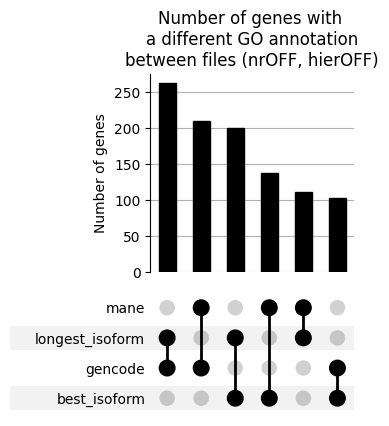

In [25]:
gene_set = [gene for gene in chr1_mane_nrOFF.genes]


data = upsetplot.from_memberships([
    ['gencode','longest_isoform'],
    ['gencode','mane'],
    ['gencode','best_isoform'],
    ['longest_isoform','mane'],
    ['longest_isoform','best_isoform'],
    ['mane','best_isoform'],
],
data = [
    len(poa.genes_with_diff_go_terms(chr1_all_nrOFF, chr1_long_nrOFF, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_all_nrOFF, chr1_mane_nrOFF, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_all_nrOFF, chr1_best_nrOFF, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_long_nrOFF, chr1_mane_nrOFF, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_long_nrOFF, chr1_best_nrOFF, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_mane_nrOFF, chr1_best_nrOFF, gene_set=gene_set)),
]
)


upsetplot.plot(data, sort_by='cardinality', sort_categories_by='input', totals_plot_elements=0 )
pyplot.title('Number of genes with \na different GO annotation\nbetween files (nrOFF, hierOFF)')
pyplot.ylabel('Number of genes')
pyplot.show()

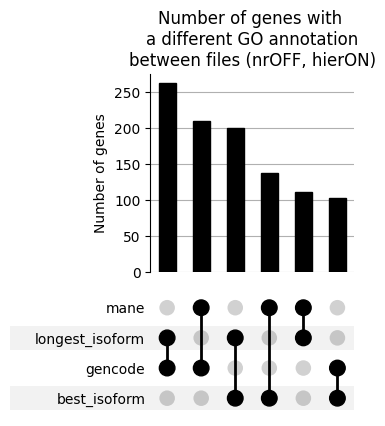

In [26]:
gene_set = [gene for gene in chr1_mane_nrOFF.genes]


data = upsetplot.from_memberships([
    ['gencode','longest_isoform'],
    ['gencode','mane'],
    ['gencode','best_isoform'],
    ['longest_isoform','mane'],
    ['longest_isoform','best_isoform'],
    ['mane','best_isoform'],
],
data = [
    len(poa.genes_with_diff_go_terms_with_hierarchy(chr1_all_nrOFF, chr1_long_nrOFF, gene_set=gene_set, go_graph=GO_GRAPH)),
    len(poa.genes_with_diff_go_terms_with_hierarchy(chr1_all_nrOFF, chr1_mane_nrOFF, gene_set=gene_set, go_graph=GO_GRAPH)),
    len(poa.genes_with_diff_go_terms_with_hierarchy(chr1_all_nrOFF, chr1_best_nrOFF, gene_set=gene_set, go_graph=GO_GRAPH)),
    len(poa.genes_with_diff_go_terms_with_hierarchy(chr1_long_nrOFF, chr1_mane_nrOFF, gene_set=gene_set, go_graph=GO_GRAPH)),
    len(poa.genes_with_diff_go_terms_with_hierarchy(chr1_long_nrOFF, chr1_best_nrOFF, gene_set=gene_set, go_graph=GO_GRAPH)),
    len(poa.genes_with_diff_go_terms_with_hierarchy(chr1_mane_nrOFF, chr1_best_nrOFF, gene_set=gene_set, go_graph=GO_GRAPH)),
]
)


upsetplot.plot(data, sort_by='cardinality', sort_categories_by='input', totals_plot_elements=0 )
pyplot.title('Number of genes with \na different GO annotation\nbetween files (nrOFF, hierON)')
pyplot.ylabel('Number of genes')
pyplot.show()

In [27]:
print(set(gene_nrOFF_hierOFF) ^ set(gene_nrOFF_hierON))  # list of gene different in one of the dataset and not the other

set()


Genes marked as different are strictly the same between the OFFOFF and OFFON dataset (for chromosome one).

In [28]:
print(poa.mean_similarity(poa.gogo_similarity_between_annotation(chr1_all_nrON, chr1_all_nrOFF)))
print(poa.mean_similarity(poa.gogo_similarity_between_annotation_with_hierarchy(chr1_all_nrON, chr1_all_nrOFF,GO_GRAPH, (False, True))))
print(poa.mean_similarity(poa.gogo_similarity_between_annotation_with_hierarchy(chr1_all_nrON, chr1_all_nrON,GO_GRAPH, (False,True))))
print(poa.mean_similarity(poa.gogo_similarity_between_annotation_with_hierarchy(chr1_all_nrON, chr1_all_nrOFF,GO_GRAPH, (True,True))))
print(poa.mean_similarity(poa.gogo_similarity_between_annotation_with_hierarchy(chr1_all_nrON, chr1_all_nrOFF,GO_GRAPH, (True,False))))
print(poa.mean_similarity(poa.gogo_similarity_between_annotation_with_hierarchy(chr1_all_nrOFF, chr1_all_nrOFF,GO_GRAPH, (True,False))))

{'BP': 0.5663072118114715, 'CC': 0.7420950369588187, 'MF': 0.756513106525378}
{'BP': 0.5655491198182857, 'CC': 0.7420950369588187, 'MF': 0.7442944785276098}
{'BP': 0.5668364565587736, 'CC': 0.7494186906019026, 'MF': 0.7578655883993313}
{'BP': 0.9938989784336004, 'CC': 0.9880005279831042, 'MF': 0.9862658862876243}
{'BP': 0.9932060158910352, 'CC': 0.9880005279831042, 'MF': 0.9835830546265333}
{'BP': 0.9989250851305336, 'CC': 1.0, 'MF': 0.9937101449275343}


OFFON and OFFOFF are very similar.
However some gene differ.

In [29]:
comp = poa.genes_with_diff_go_terms_with_hierarchy(chr1_all_nrOFF, chr1_all_nrOFF, GO_GRAPH, (False, True))
comp2 = poa.genes_with_diff_go_terms_with_hierarchy(chr1_all_nrON, chr1_all_nrOFF, GO_GRAPH, (True, False))
comp3 = poa.genes_with_diff_go_terms_with_hierarchy(chr1_all_nrON, chr1_all_nrOFF, GO_GRAPH, (True, True))
print(len(comp), len(comp2), len(comp3))

797 1478 1370


In [30]:
diffdict = dict()
for gene in comp:
    aOFFOFF = chr1_all_nrOFF.genes[gene].get_go_term_id()
    aOFFON = poa.go_list_to_go_ancestry(chr1_all_nrOFF.genes[gene].get_go_term_id(),GO_GRAPH)
    diffdict[gene] = [aOFFOFF, aOFFON, set(aOFFOFF) ^ set(aOFFON)]
    

In [31]:
[(a,diffdict[a][2]) for a in diffdict]
print(diffdict['ENSG00000188976'][0],
      diffdict['ENSG00000188976'][1],
      diffdict['ENSG00000188976'][2],
      sep='\n')


['GO:0009411', 'GO:0005634', 'GO:1902532', 'GO:0006357', 'GO:2001233', 'GO:1901984', 'GO:0009314', 'GO:0032993', 'GO:0071840', 'GO:0031491', 'GO:0005654', 'GO:1901983', 'GO:0019219', 'GO:0005515', 'GO:0048583', 'GO:0010557', 'GO:0031327', 'GO:0048585', 'GO:0009889', 'GO:1902679', 'GO:0043227', 'GO:0051248', 'GO:0009966', 'GO:0043231', 'GO:0005730', 'GO:0006355', 'GO:0023051', 'GO:0000786', 'GO:0097159', 'GO:0031324', 'GO:0030689', 'GO:0104004', 'GO:2000757', 'GO:0031323', 'GO:2000756', 'GO:0035067', 'GO:0010646', 'GO:0016043', 'GO:0043232', 'GO:0044085', 'GO:0010558', 'GO:0051253', 'GO:0070228', 'GO:0002039', 'GO:0045892', 'GO:2000106', 'GO:2001234', 'GO:0065007', 'GO:0051252', 'GO:0071214', 'GO:0080090', 'GO:0009892', 'GO:0003682', 'GO:0016020', 'GO:0010556', 'GO:0051716', 'GO:0050789', 'GO:1990904', 'GO:1901363', 'GO:0060255', 'GO:0003676', 'GO:0070013', 'GO:0043069', 'GO:0009890', 'GO:0031056', 'GO:0000785', 'GO:0009968', 'GO:2001243', 'GO:0012501', 'GO:0043233', 'GO:0042254', 'GO:0

In [32]:
GO_GRAPH.remove_edges_from([edge for edge in GO_GRAPH.edges if edge[2] != 'is_a'])  # remove part_of


In [33]:
comp = poa.genes_with_diff_go_terms_with_hierarchy(chr1_all_nrOFF, chr1_all_nrOFF, GO_GRAPH, (False, True))
comp2 = poa.genes_with_diff_go_terms_with_hierarchy(chr1_all_nrON, chr1_all_nrOFF, GO_GRAPH, (True, False))
print(len(comp), len(comp2))


797 1856


In [34]:
diffdict = dict()
for gene in comp:
    aOFFOFF = chr1_all_nrOFF.genes[gene].get_go_term_id()
    aOFFON = poa.go_list_to_go_ancestry(chr1_all_nrOFF.genes[gene].get_go_term_id(),GO_GRAPH)
    diffdict[gene] = [aOFFOFF, aOFFON, set(aOFFOFF) ^ set(aOFFON)]

We'll still keep OFFOFF because  it's similar to OFFON, the difference won't affect us and it is more convenient to use.
We take note of the diffence.